In [1]:
import hicexplorer

In [2]:
from hicmatrix import HiCMatrix as hm
from hicexplorer._version import __version__
from hicexplorer.lib import Viewpoint

In [34]:
def compute_background(pReferencePoints, pViewpointObj, pArgs):

    background_model_data = {}
    relative_positions = set()

    background_model_data_raw = {}
    relative_positions_raw = set()
#     print('1')
    for i, referencePoint in enumerate(pReferencePoints):

        region_start, region_end, _ = pViewpointObj.calculateViewpointRange(referencePoint, (pArgs.fixateRange, pArgs.fixateRange))
#         print('2')

        data_list = pViewpointObj.computeViewpoint(referencePoint, referencePoint[0], region_start, region_end)
        
        # set data in relation to viewpoint, upstream are negative values, downstream positive, zero is viewpoint
        view_point_start, _ = pViewpointObj.getReferencePointAsMatrixIndices(referencePoint)
        view_point_range_start, view_point_range_end = \
            pViewpointObj.getViewpointRangeAsMatrixIndices(referencePoint[0], region_start, region_end)
#         print('3')

        for i, data in zip(range(view_point_range_start, view_point_range_end, 1), data_list):
            relative_position = i - view_point_start
            if relative_position in background_model_data_raw:
                background_model_data_raw[relative_position] += data
            else:
                background_model_data_raw[relative_position] = data
                # relative_positions_raw.add(relative_position)
#         print('4')

        if pArgs.averageContactBin > 0:
            data_list = pViewpointObj.smoothInteractionValues(data_list, pArgs.averageContactBin)
#         print('5')

        for i, data in zip(range(view_point_range_start, view_point_range_end, 1), data_list):
            relative_position = i - view_point_start
            if relative_position in background_model_data:
                background_model_data[relative_position].append(data)
            else:
                background_model_data[relative_position] = [data]
                relative_positions.add(relative_position)
#         print('6')
    
#     pQueue.put([background_model_data, relative_positions, background_model_data_raw])
    return background_model_data, relative_positions

In [14]:
referenceFilePath = '/media/wolffj/Backup Joachim/data/stephanViewpoint/view_chr15.bed'

In [31]:
viewpointObj = Viewpoint()
referencePoints, _ = viewpointObj.readReferencePointFile(referenceFilePath)

In [18]:
class Args:
    fixateRange = 500000
    averageContactBin = 5
args = Args()

In [21]:
args.averageContactBin

5

In [16]:
matrices = ['/media/wolffj/Backup Joachim/data/stephanViewpoint/P1_chr15.h5']#, 
#             '/media/wolffj/Backup Joachim/data/stephanViewpoint/Sham.h5',
#            '/media/wolffj/Backup Joachim/data/stephanViewpoint/TAC.h5']

In [35]:
for matrix in matrices:
    hic_ma = hm.hiCMatrix(matrix)
    # hic_ma.
    viewpointObj.hicMatrix = hic_ma
    
    background_model_data, relative_positions = compute_background(referencePoints, viewpointObj, args)
    

DEBUG:hicmatrix.HiCMatrix:Load self.matrixFileHandler
DEBUG:hicmatrix.lib.h5:Load in h5 format


In [37]:
import matplotlib.pyplot as plt

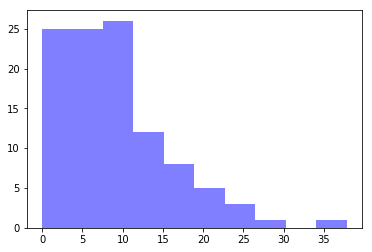

In [46]:
num_bins = 10
n, bins, patches = plt.hist(background_model_data[2], num_bins, facecolor='blue', alpha=0.5)
plt.show()

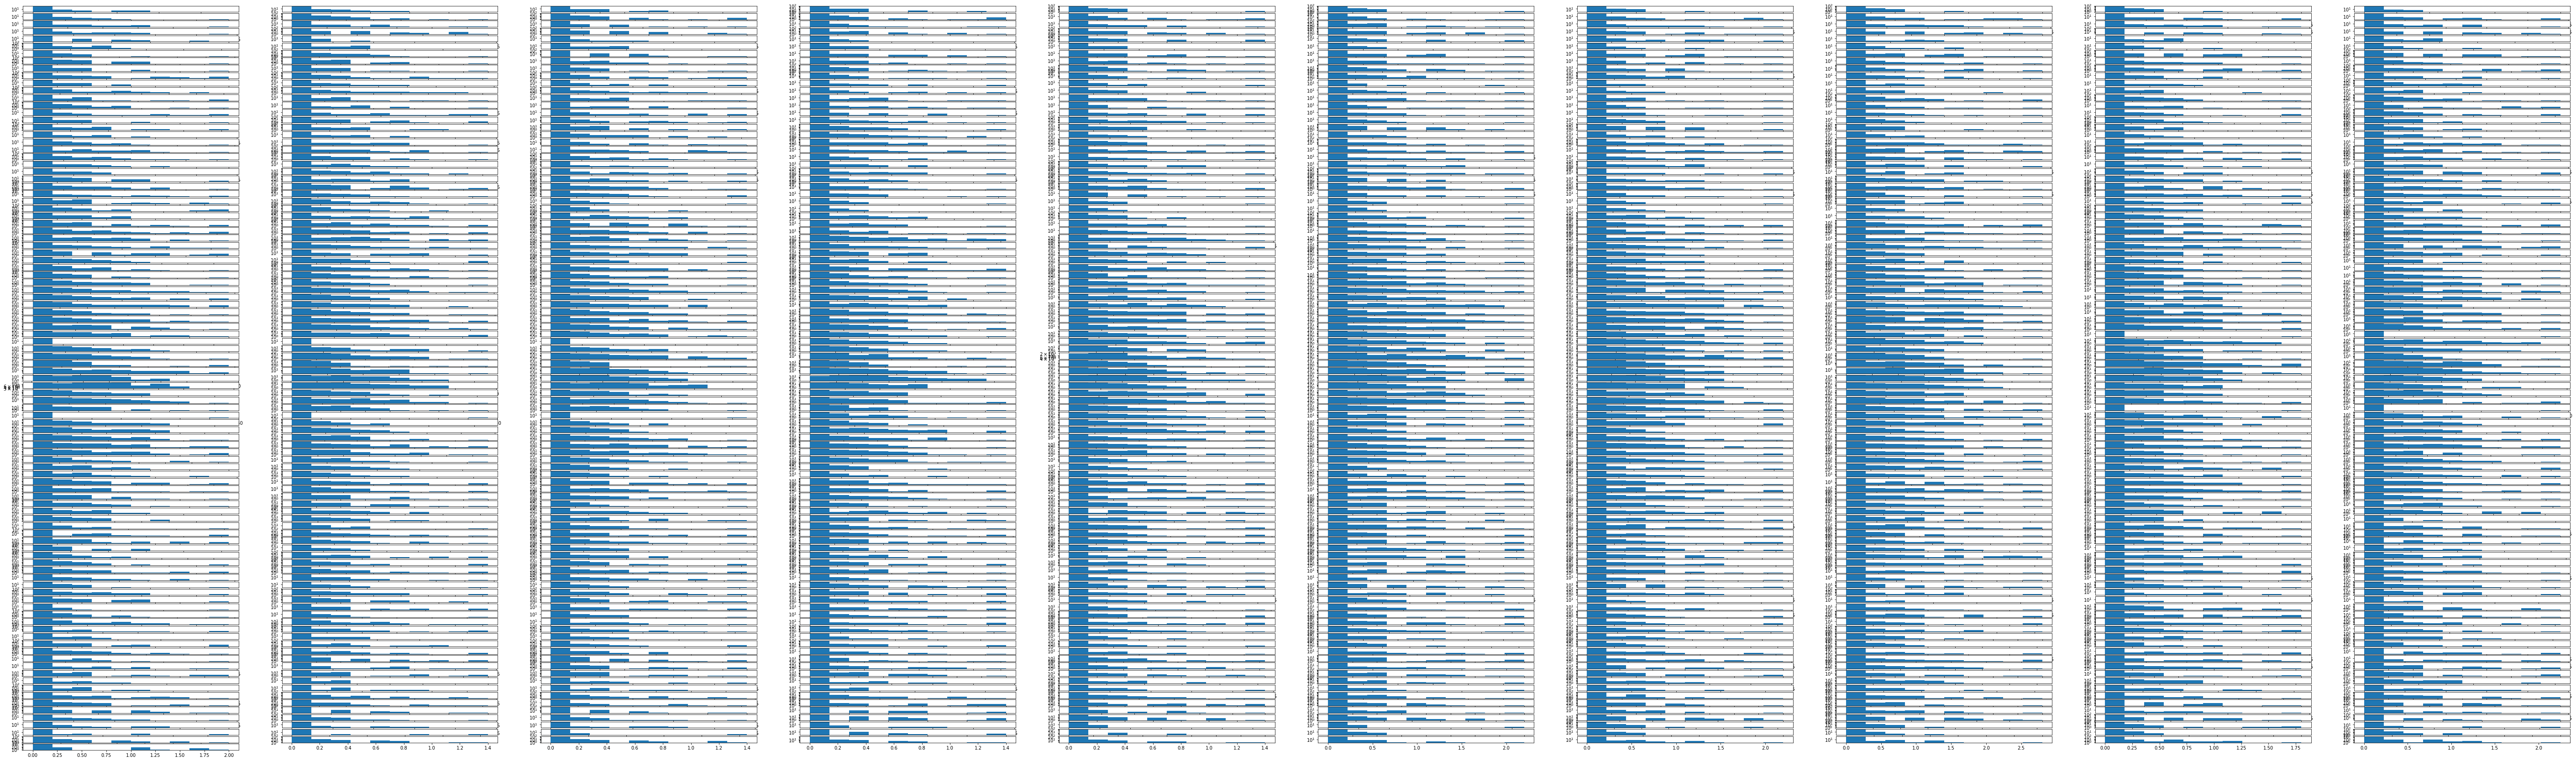

In [55]:
w=10
h=100
fig=plt.figure(figsize=(100, 30))
columns = 10
rows = 101
for i, key in enumerate(background_model_data):
#     img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
#     plt.imshow(img)
    plt.hist(x=background_model_data[key], bins=10, log=True)
plt.savefig('histograms_nolog.png', dpi=300)

In [58]:
import fit_nbinom
import numpy as np
# nbinom_parameters = fit_nbinom.fit(
#             np.array(genomic_distance_distributions[key]))
#         nbinom_distance = nbinom(
#             nbinom_parameters['size'], nbinom_parameters['prob'])

In [59]:
nbinom_parameters = {}

for i, key in enumerate(background_model_data):
    nbinom_parameters[key] = fit_nbinom.fit(np.array(background_model_data[key]))

{-500: {'size': 1.1326016914086408, 'prob': 0.8780983015323277},
 -499: {'size': 6.341618254835912, 'prob': 0.9749804027087109},
 -498: {'size': 54.54117410574683, 'prob': 0.9976228073943588},
 -497: {'size': 72.76023731676051, 'prob': 0.9979814097312071},
 -496: {'size': 61.42714402891052, 'prob': 0.9978707766141259},
 -495: {'size': 59.8024531453536, 'prob': 0.9980157448219007},
 -494: {'size': 53.99260928350791, 'prob': 0.9981723251973282},
 -493: {'size': 55.30364784167264, 'prob': 0.9976475105997576},
 -492: {'size': 55.20387040540473, 'prob': 0.9979875143040216},
 -491: {'size': 10.000019385320698, 'prob': 0.9869634000406413},
 -490: {'size': 10.000010582388546, 'prob': 0.986963801969465},
 -489: {'size': 95.7158355931825, 'prob': 0.9985420296302853},
 -488: {'size': 87.59710828214821, 'prob': 0.9984730312281944},
 -487: {'size': 69.93421706726711, 'prob': 0.9978999480885473},
 -486: {'size': 61.439677904401876, 'prob': 0.9982427002865956},
 -485: {'size': 57.00528219277428, 'pro